<a href="https://colab.research.google.com/github/Ritacheta/Cifar-10-Project/blob/master/CIFAR_10_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing **Libraries**

In [ ]:
# Load the TensorBoard notebook extension
%load_ext tensorboard

In [5]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import ResNet101
from tensorflow.keras.applications.resnet import preprocess_input
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.regularizers import l2
from tensorflow.keras.datasets import cifar10
import datetime
import os
import numpy as np
import matplotlib.pyplot as plt

In [6]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
train_labels = tf.keras.utils.to_categorical( train_labels, num_classes=10, dtype='float32')
test_labels = tf.keras.utils.to_categorical(test_labels, num_classes=10, dtype='float32')

170500096/170498071 [==============================] - 4s 0us/step


In [7]:
# Clear any logs from previous runs
!rm -rf ./logs/

In [8]:
class_names = ['airplane','automobile','bird','cat','deer','dog',
               'frog','horse','ship','truck']

Process **images**

In [9]:
train_datagen = ImageDataGenerator(
    rescale = 1./255.0,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
    )

test_datagen = ImageDataGenerator(
    rescale = 1./255.0,
    )

batch_size=64

training_set = train_datagen.flow(train_images,train_labels,
                                  batch_size=batch_size)

test_set = test_datagen.flow(test_images,test_labels,
                                  batch_size=batch_size)


Creating the Network

In [26]:
model =Sequential([
                   Conv2D(32, (3,3), activation='relu', padding='same', input_shape = (32,32,3)),
                   BatchNormalization(),
                   Conv2D(32, (3,3), activation='relu', padding='same'),
                   BatchNormalization(),
                   Conv2D(64, (3,3), activation='relu', padding='same'),
                   BatchNormalization(),
                   Conv2D(64, (3,3), activation='relu', padding='same'),
                   BatchNormalization(),
                   MaxPooling2D((2,2)),
                   Conv2D(128, (3,3), activation='relu', padding='same'),
                   BatchNormalization(),
                   Conv2D(128, (3,3), activation='relu', padding='same'),
                   BatchNormalization(),
                   MaxPooling2D((2,2)),
                   Conv2D(256, (3,3), activation='relu', padding='same'),
                   BatchNormalization(),
                   Conv2D(256, (3,3), activation='relu', padding='same'),
                   BatchNormalization(),
                   MaxPooling2D((2,2)),
                   Conv2D(512, (3,3), activation='relu', padding='same'),
                   BatchNormalization(),
                   Conv2D(512, (3,3), activation='relu', padding='same'),
                   BatchNormalization(),
                   MaxPooling2D((2,2)),
                   Flatten(),
                   Dense(512, activation='relu', kernel_regularizer=l2(1e-4)),
                   BatchNormalization(),
                   Dropout(0.3),
                   Dense(512, activation='relu', kernel_regularizer=l2(1e-4)),
                   BatchNormalization(),
                   Dropout(0.3),
                   Dense(10, activation='softmax')
])


In [27]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_22 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_23 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 32, 32, 64)        18496     
_________________________________________________________________
batch_normalization_24 (Batc (None, 32, 32, 64)        256       
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 32, 32, 64)       

Optimizer

In [28]:
 opt = tf.keras.optimizers.Adam(
    learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False, name='Adam'
 )
 
model.compile(optimizer=opt,
    loss='categorical_crossentropy',
    metrics=['acc'])

In [29]:
# history = model.fit(train_images, train_labels, epochs=50, batch_size=64, validation_data=(test_images, test_labels))
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
save_best_model = tf.keras.callbacks.ModelCheckpoint('./best_model.h5', monitor='val_acc', verbose=1, save_bestimages_only=True)
history = model.fit(training_set, epochs=10, validation_data=test_set, callbacks = [tensorboard_callback])

Epoch 1/10
782/782 [==============================] - 32s 41ms/step - loss: 1.7188 - acc: 0.4569 - val_loss: 1.6963 - val_acc: 0.5276
Epoch 2/10
782/782 [==============================] - 31s 40ms/step - loss: 1.0771 - acc: 0.6690 - val_loss: 1.3081 - val_acc: 0.6293
Epoch 3/10
782/782 [==============================] - 32s 41ms/step - loss: 0.8780 - acc: 0.7363 - val_loss: 1.2653 - val_acc: 0.6484
Epoch 4/10
782/782 [==============================] - 31s 40ms/step - loss: 0.7465 - acc: 0.7777 - val_loss: 0.7250 - val_acc: 0.7829
Epoch 5/10
782/782 [==============================] - 31s 40ms/step - loss: 0.6516 - acc: 0.8038 - val_loss: 0.6750 - val_acc: 0.7995
Epoch 6/10
782/782 [==============================] - 31s 40ms/step - loss: 0.5875 - acc: 0.8259 - val_loss: 0.6866 - val_acc: 0.7993
Epoch 7/10
782/782 [==============================] - 31s 40ms/step - loss: 0.5410 - acc: 0.8380 - val_loss: 0.5934 - val_acc: 0.8216
Epoch 8/10
782/782 [==============================] - 31s 40ms

In [18]:
model.evaluate(test_set, verbose=1)

157/157 [==============================] - 2s 10ms/step - loss: 0.6289 - acc: 0.8587


[0.6288815140724182, 0.8586999773979187]

Ploting train vs **validation**

In [ ]:
%tensorboard --logdir logs/fit

Launching TensorBoard...

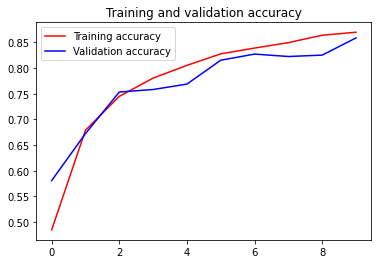

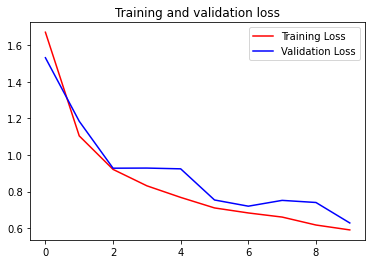

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()